In [45]:
import loader_scripts.dateLoader as dl

data = dl.load('data/raw')
print(data)


{'trendData': {'googleTrendData': {'Nvidia RTX 3060-Ti': {datetime.date(2004, 1, 1): 0, datetime.date(2004, 2, 1): 0, datetime.date(2004, 3, 1): 0, datetime.date(2004, 4, 1): 0, datetime.date(2004, 5, 1): 0, datetime.date(2004, 6, 1): 0, datetime.date(2004, 7, 1): 0, datetime.date(2004, 8, 1): 0, datetime.date(2004, 9, 1): 0, datetime.date(2004, 10, 1): 0, datetime.date(2004, 11, 1): 0, datetime.date(2004, 12, 1): 0, datetime.date(2005, 1, 1): 0, datetime.date(2005, 2, 1): 0, datetime.date(2005, 3, 1): 0, datetime.date(2005, 4, 1): 0, datetime.date(2005, 5, 1): 0, datetime.date(2005, 6, 1): 0, datetime.date(2005, 7, 1): 0, datetime.date(2005, 8, 1): 0, datetime.date(2005, 9, 1): 0, datetime.date(2005, 10, 1): 0, datetime.date(2005, 11, 1): 0, datetime.date(2005, 12, 1): 0, datetime.date(2006, 1, 1): 0, datetime.date(2006, 2, 1): 0, datetime.date(2006, 3, 1): 0, datetime.date(2006, 4, 1): 0, datetime.date(2006, 5, 1): 0, datetime.date(2006, 6, 1): 0, datetime.date(2006, 7, 1): 0, dateti

<IPython.core.display.Javascript object>


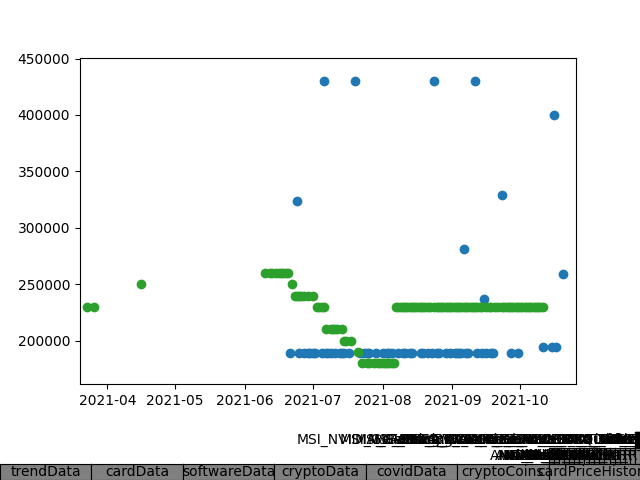

In [46]:
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from matplotlib.widgets import Button

%matplotlib notebook

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)

def hideAll(bdata):
    if 'children' in bdata:
        for c in bdata['children']:
            hideAll(bdata['children'][c])
    bdata['button'].ax.set_visible(False)
    bdata['button'].color = 'grey'
    bdata['button'].hovercolor = 'lightgrey'
    bdata['state'] = False
    if 'ax' in bdata:
        bdata['ax'].set_visible(False)
        
def mkplot(data):
    return date2num(list(data.keys())), list(data.values())

def makeUI(data, bdata = {}, level=0, npp=1, r=0):
    nprops = len(list(data.keys()))*npp

    for i, prop in enumerate(data):
        bdata[prop] = {}
        if isinstance(data[prop], list):
            return
        if isinstance(list(data[prop].keys())[0], date):
            x, y = mkplot(data[prop])
            bdata[prop]['ax'], = ax.plot_date(x, y)
            bdata[prop]['ax'].set_visible(False)
        else:
            bdata[prop]['children'] = {}
            makeUI(data[prop], bdata[prop]['children'], level+1, nprops, r + i/nprops)

        bdata[prop]['state'] = False

        def onclick(bdata):
            def wrapped(_):
                bdata['state'] = not bdata['state']
                if bdata['state']:
                    if 'children' in bdata:
                        for b in bdata['children']:
                            bdata['children'][b]['button'].ax.set_visible(True)
                            bdata['children'][b]['state'] = False
                    else:
                        bdata['button'].color = 'green'
                        bdata['button'].hovercolor = 'lightgreen'
                        bdata['ax'].set_visible(True)
                        plt.draw()
                else:
                    bdata['button'].color = 'grey'
                    bdata['button'].hovercolor = 'lightgrey'
                    if 'children' in bdata:
                        for c in bdata['children']:
                            hideAll(bdata['children'][c])
                    if 'ax' in bdata:
                        bdata['ax'].set_visible(False)
                plt.draw()

            return wrapped
        height = 30
        axs = plt.axes([r + i/nprops, level/height, 1/nprops, 1/height])
        bdata[prop]['button'] = Button(axs, prop, color='grey', hovercolor='lightgrey')
        bdata[prop]['button'].on_clicked(onclick(bdata[prop]))

        if level != 0:
            bdata[prop]['button'].ax.set_visible(False)
        plt.draw()
        


makeUI(data)
plt.show()